In [1]:
%matplotlib inline


# `Python` in Atmospheric Sciences

***

<center>
<img src="https://jupytertest.arcc.albany.edu/user/ns742711/kernelspecs/python3/logo-64x64.png"/> 
<br>
<img src="https://jupytertest.arcc.albany.edu/hub/logo"/>
</center>

***
<p>By Nicholas Schiraldi, PhD <br> Data Analytics and Visualization Specialist <br>
Academic and Research Computing Center, ITS <br>
University at Albany</p>

# Overview


- <font size=8px>What is Python?</font>
- <font size=8px>Why Python?</font>
- <font size=8px>How/where can I use Python?</font>
- <font size=8px>Let's run some code!</font>

<font size=14px>What is Python?</font><br>
***
<font size=8px> Python is
    - open source (wohoo!)
    - object oriented
    - high level 
    - quickly growing (development and active users)
</font>
<br>
<font size=8px>... and it can do many <bold>powerful</bold> analytics</font>

# An estimate of popularity...
***
<br>
<img src="images/lang-rank-118-redmonk.png"></img>

# Why Python?

***

<font size=6px> 
- It is free and open source, and has many packages for math, statistics, mapping, and atmospheric sciences!
    - numpy, xarray, pandas, scikit-learn, cartopy, metpy, etc.
- It is widely used in the private sector (especially where you may be employed!)
    - insurance companies, investment banks, research firms
- Makes publication ready graphics, with very little effort
- Active external user support community (i.e. stackoverflow, github)
- Many powerful tools to extend it's usability (i.e. jupyter notebook)
</font>


# Some examples of Graphics
***
<img src = "images/horizontal_map.gif"/>

# Some examples of Graphics
***
<img src = "images/hovmoller.gif"/>

# Some examples of Graphics
***
<img src = "images/trajectories.gif"/>

# Some examples of Graphics
***

<img src="https://unidata.github.io/MetPy/latest/_images/sphx_glr_Advanced_Sounding_001.png"/>

# How, where, can I use Python?
***
<font size=8px> UAlbany Resources</font>
<font size=6px>
- Large memory machine (netid@lmm.rit.albany.edu)
    - you can manage an <a href="https://www.anaconda.com/download/#linux">anaconda</a> in your home (10GB quota) or advisors lab directory (1TB quota), be sure to source this in your ~/.bash_profile
    - or use pip install [package] --user
- General Purpose Cluster
    - You can submit jobs to the general purpose cluster from netid@headnode7.rit.albany.edu via <a href="https://slurm.schedmd.com/">SLURM</a>
- Jupyterhub instance
    - Coming soon, a jupyterhub instance which will spawn notebooks on the cluster!
</font>
<font size=8px> DAES Resources</font>
<font size=6px>
- Talk to Kevn Tyle or your advisor about accessing DAES computing resources
</font><br>
<font size=8px> Getting Started </font>
<font size=6px>Check out this intro <a href="https://www.johnny-lin.com/pyintro/">Johnny Lin</a></font>

# Alright, let's have some fun...
***

<font size=6px> Please point your web browser to jupytertest.arcc.albany.edu. While we are using this today for demonstration, please do not use this in the future. This server is not stable! </font>

# 1. Let's import some modules that we are going to use. For the exercise, we will use pandas to do some table mining

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now, we need to connect to a datasource. For this exercise, we will work with timeseries data. Let's explore the utility of pandas for this.

Use pandas to read GHCN data from Amazon S3 (https://docs.opendata.aws/noaa-ghcn-pds/readme.html). Load 2018, and work with Albany (USW00014735)

In [3]:
df = pd.read_csv(
    'http://noaa-ghcn-pds.s3.amazonaws.com/csv/2018.csv',
    header = None,
    names = ['id','date','element','value','m','q','s','obs_time']
).set_index('id')

Let's do the following:
1. Create a new dataframe for albany called KALB, and set the index to be a datetime object
2. Temperature is reported in tenths degree C, let's convert each element (TMIN,TMAX,TAVG) to Fahrenheit
3. Finally, let's plot TMIN, TMAX and get some basic monthly statistics summarizing 2018

In [4]:
KALB = df.loc['USW00014735'].set_index('date') # After we set the index to id, we can index based on the station identifier
KALB.index = pd.to_datetime(KALB.index.astype(str).values)# convert the index to a datetime object

# TMAX First
KALB.loc[KALB.element == 'TMAX','value'] = ((KALB.value[KALB.element == 'TMAX'] / 10) * (9/5)) + 32
KALB.loc[KALB.element == 'TMIN','value'] = ((KALB.value[KALB.element == 'TMIN'] / 10) * (9/5)) + 32
KALB.loc[KALB.element == 'TAVG','value'] = ((KALB.value[KALB.element == 'TAVG'] / 10) * (9/5)) + 32

What was the average temperature of January?

In [1]:
KALB['2018-01'].groupby('element').mean().loc[['TMAX','TMIN','TAVG']]

NameError: name 'KALB' is not defined

Can we quickly describe all of the fields, for february?

In [6]:
KALB['2018-02'].loc[:,'value'].groupby(KALB['2018-02'].element).describe()

,count,mean,std,min,25%,50%,75%,max
element,,,,,,,,
AWND,28.0,40.571429,15.276291,18.00,28.75,39.50,49.750,81.00
PRCP,28.0,28.035714,47.364999,0.00,0.00,3.00,50.500,170.00
SNOW,28.0,12.642857,35.186502,0.00,0.00,0.00,0.000,157.00
SNWD,28.0,41.428571,53.313488,0.00,0.00,15.00,80.000,180.00
TAVG,28.0,32.945000,10.135517,15.08,26.42,32.99,39.965,59.18
TMAX,28.0,41.610714,11.457993,26.24,33.98,39.47,46.265,73.04
TMIN,28.0,23.424286,10.201202,2.12,15.26,25.16,30.200,42.98
WDF2,28.0,219.285714,69.757706,30.00,170.00,185.00,280.000,330.00
WDF5,28.0,229.642857,61.130228,150.00,170.00,220.00,290.000,320.00


Plot TMAX, TMIN, TAVG for January through March. We're going to do this in one line!

element
TAVG    AxesSubplot(0.125,0.125;0.775x0.755)
TMAX    AxesSubplot(0.125,0.125;0.775x0.755)
TMIN    AxesSubplot(0.125,0.125;0.775x0.755)
Name: value, dtype: object

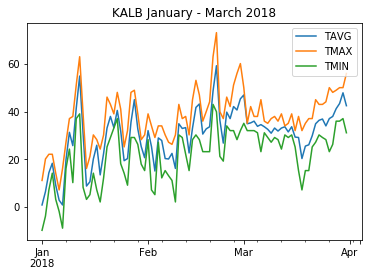

In [7]:
fig,ax = plt.subplots()
KALB[
    list(
        map(
            lambda x: x in ['TMAX','TMIN','TAVG'],KALB.element.values
        )
    )
]['2018-01':'2018-03'].groupby(
    'element'
).value.plot(title='KALB January - March 2018',legend = True,ax = ax)

Now, let's plot cumulative snowfall from January - March

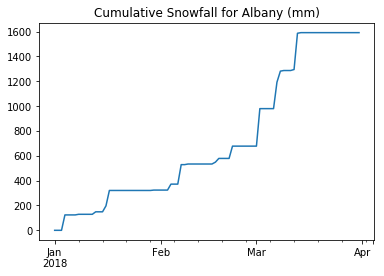

In [20]:
KALB[KALB.element == 'SNOW']['20180101':'20180331'].value.cumsum().plot(
    title = 'Cumulative Snowfall for Albany (mm)'
)

## 2. Now, let's plot some forecast data. We will load in the 1 degree GFS via OPenDAP from NCEP (http://nomads.ncep.noaa.gov:9090/dods/gfs_1p00 ). 

In [8]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

To save memory, we don't want to access in the whole fileset. Instead, we will slice a subset. Let's grab 2-meter temperature, u,v @ 300mb, and height @ 500mb, for the northern hemisphere. Let's take a look at the data.

In [9]:
gfs = xr.open_dataset('http://nomads.ncep.noaa.gov:9090/dods/gfs_1p00/gfs20181001/gfs_1p00_00z')

In [10]:
t2m = (gfs['tmp2m'].sel(lat = slice(0,90)) - 273.15) * (9/5) + 32
h500 = gfs['hgtprs'].sel(lat=slice(0,90), lev=500)
u = gfs['ugrdprs'].sel(lat=slice(0,90), lev=300)
v = gfs['vgrdprs'].sel(lat=slice(0,90), lev=300)

Now, plot a polar stereographic map and contour t2m (blue/red), H500 black, and plot u,v

Text(0.5, 1.0, 'OOOO UTC GFS Op 10/01 00:00 | F000 10/01 00:00 \n U,V @ 300 (shaded), H500 (contoured)')

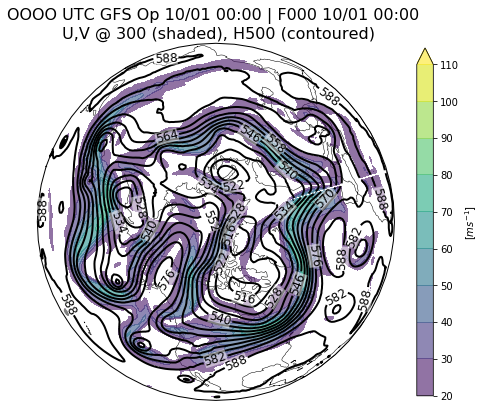

In [11]:
fig = plt.figure(figsize = (8,8))

# initialize the map axes
ax = plt.axes(projection=ccrs.Orthographic(-107, 90))
ax.add_feature(cfeature.LAND,zorder=0, edgecolor='k',facecolor = 'w',linewidth = 0.5)

# Fill contour wind speed
speed = np.sqrt(u**2 + v**2)
cb = ax.contourf(
    speed.sel(time = '20181001T00:00'),
    levels = np.arange(20,120,10),
    extend = 'max',
    transform = ccrs.PlateCarree(), # don't forget your transform!!
    alpha = 0.6
)

# Contour H500
cs = ax.contour(
    h500.sel(time = '20181001T00:00')* 10 **-1,  
    levels = np.arange(450,700,6),
    transform = ccrs.PlateCarree(),
    colors = 'k',
    linestyles = '-',
    linewidths = 2
)

# add contour labels
clabels = ax.clabel(cs,fmt = '%1.0f',fontsize=12)

# Make the contour labels stick out
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0,alpha = 0.5)) for txt in clabels]; 

# here, we'll simply use the colorbar proprty to add it to the figure
plt.colorbar(cb,label = r'$[ms^{-1}]$',shrink = 0.8)

# Don't forget a title
ax.set_title(
    'OOOO UTC GFS Op {itime} | F000 {ftime} \n U,V @ 300 (shaded), H500 (contoured)'.format(
        itime=pd.to_datetime(h500.time.values[0]).strftime('%m/%d %H:%M'),
        ftime=pd.to_datetime(h500.time.values[0]).strftime('%m/%d %H:%M')
    ), fontsize = 16
)

Modify the above to plot the a forecast hour for 10/12